# Step 1: Problem Understanding & Framing

## Domain: **Cybersecurity**

## Use Case: **Spam Email Detection**

Spam emails are a common cybersecurity threat that aim to deceive users, spread malware, or deliver fraudulent content. These emails often contain misleading messages designed to trick recipients into clicking malicious links, sharing sensitive information, or downloading harmful attachments.  

Due to the large volume of emails sent every day, manual spam filtering is inefficient and unreliable.

The goal of this project is to design and implement a machine learning–based spam email detection system that can automatically classify emails as **spam** or **legitimate (ham)**. This system is intended to support email security mechanisms by improving detection accuracy and reducing the risk of user exposure to malicious content.

From a data science perspective, this problem is formulated as a **binary classification task**, where the target variable indicates whether an email is spam (`1`) or not spam (`0`). The model learns patterns from numerical features extracted from email content, such as word frequencies, special character usage, and capitalization patterns.

---

## Business and Security Objective
- Improve the accuracy and reliability of spam detection systems.
- Minimize **false positives** (legitimate emails flagged as spam).
- Reduce **false negatives** (undetected spam emails), as these pose security risks, phishing, or malware infections.

---

## Evaluation Metrics
- **Precision** – measures how many detected spam emails are actually spam.
- **Recall** – measures how many actual spam emails are correctly detected.
- **F1-score** – balances precision and recall.
- **ROC-AUC** – assesses overall classification performance.

> Special emphasis will be placed on **Recall**, as failing to detect spam emails poses a direct security risk.

---

# Step 2: Data Collection & Understanding

## Dataset Source
The dataset used in this project is the **Spambase Dataset**, obtained from the [UCI Machine Learning Repository](https://doi.org/10.24432/C53G6X).

This dataset is a benchmark dataset for spam email detection and has been widely referenced in academic research. It contains numerical features extracted from email messages, suitable for supervised machine learning models like Logistic Regression.

**Citation:**  
Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase [Dataset]. UCI Machine Learning Repository.

---

## Dataset Overview
- **Total instances:** 4601 emails  
- **Total features:** 57 input features  
- **Task type:** Binary classification  
- **Feature types:** Continuous / numerical  
- **Missing values:** None  

Each row represents a single email message, and columns represent extracted features related to word usage, character frequency, and formatting patterns.

---

## Target Variable
| Value | Meaning |
|-------|--------|
| 0     | Legitimate (ham) email |
| 1     | Spam email |

---

## Class Distribution
| Class | Count | Percentage |
|-------|-------|------------|
| Spam (1) | 1,813 | 39.4% |
| Legitimate (0) | 2,788 | 60.6% |

> Although the classes are not perfectly balanced, the imbalance is not extreme. Metrics like **Recall** will be prioritized during evaluation.

---

## Feature Description

### Word Frequency Features
- Measures how often specific words appear in an email (e.g., `free`, `money`, `credit`, `offer`).  
- Values normalized between 0 and 100.  
- Spam emails tend to contain certain keywords more frequently.

### Character Frequency Features
- Frequency of characters often used in spam: `!`, `$`, `#`  
- Excessive use indicates spam or promotional content.

### Capital Letter Features
- Average length of capital letter sequences  
- Total number of capital letters  
- Length of the longest sequence of capital letters  
- Excessive capitalization is a strong spam indicator.

---

## Limitations
- The dataset does not include **raw email text**, limiting interpretability.  
- Reflects historical spam patterns and may not capture new techniques.  
- Cultural and language variations are not explicitly represented.


### Import of Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

In [2]:
columns = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_semicolon",
    "char_freq_parentheses",
    "char_freq_sqbrackets",
    "char_freq_exclamation",
    "char_freq_dollar",
    "char_freq_hashtag",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    "class"
]


df = pd.read_csv("data/spambase.data", header=None, names=columns)

print(df.shape)
df.head()


(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_parentheses,char_freq_sqbrackets,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Step 3: Data Preprocessing & Feature Engineering
In this step, we clean the data, handle missing values, and prepare features for modeling. 
We also perform exploratory data analysis to understand distributions and relationships, and engineer features where necessary.

In [3]:
df.isnull().sum().sum()

np.int64(0)

### Feature scaling
We are going to use XGBoost, so no scaling is required as XGBoost is tree-based. But incase we will need to change models, we are going to create a scaled features

In [4]:
X = df.drop("class", axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train-Test Split (80-20)**
Stratify allows same proportion of spam vs legitimate emails as the original dataset.

In [5]:
# Train-Test Split with normal X values 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Train-Test Split with scaled X Values
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Model Training & Evaluation

In this step, we train multiple supervised learning models on the Spambase dataset to classify emails as spam or legitimate.  
The models tested include:

1. Logistic Regression  
2. Decision Tree  
3. Random Forest  
4. XGBoost
   
Each model is evaluated using key classification metrics: **Precision, Recall, F1-score, and ROC-AUC**.  
The goal is to identify which model performs best in detecting spam emails, with particular emphasis on **Recall**, since failing to detect spam poses a direct security risk.

After evaluation, XGBoost was found to outperform the other models in both overall metrics and Recall, and is selected as the final model for deployment.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.2,
        subsample=1,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    )
}

In [8]:
results = dict()

for name, model in models.items():
    # Scale for Logistic Regression
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    auc = roc_auc_score(y_test, y_prob)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.3f}\n")

    results[name] = {"model": model, "roc_auc": auc, "y_pred": y_pred, "y_prob": y_prob}


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

ROC-AUC: 0.970

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       558
           1       0.90      0.87      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921

ROC-AUC: 0.905

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       558
           1       0.94      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93 

In [9]:
summary = []

for name, res in results.items():
    y_pred = res["y_pred"]
    y_prob = res["y_prob"]
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    summary.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    })



In [10]:
results_df = pd.DataFrame(summary)
results_df = results_df.sort_values(by="F1-score", ascending=False)
results_df

,Model,Precision,Recall,F1-score,ROC-AUC
3,XGBoost,0.931507,0.936639,0.934066,0.986764
0,Logistic Regression,0.920904,0.898072,0.909344,0.970077
2,Random Forest,0.941003,0.878788,0.908832,0.982025
1,Decision Tree,0.897436,0.867769,0.882353,0.905364


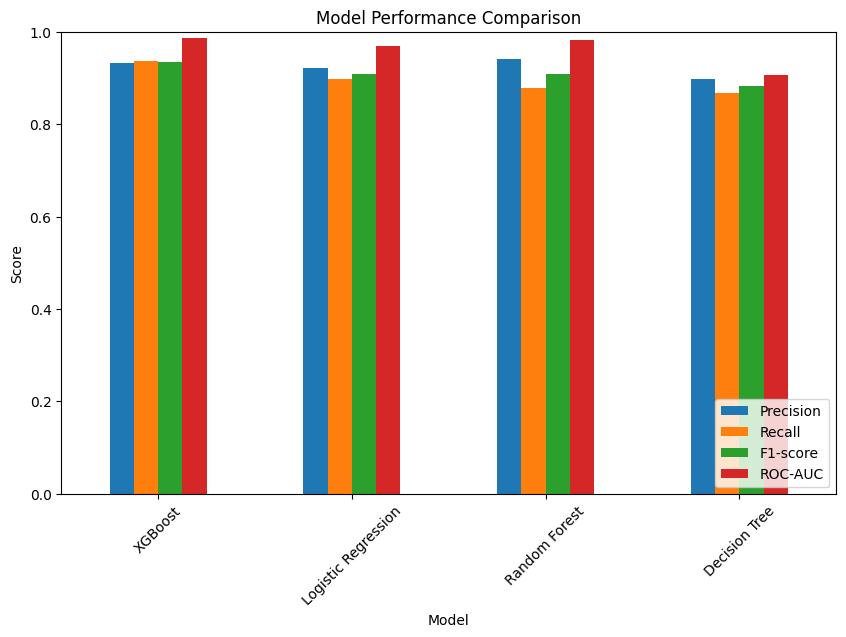

In [11]:
metrics = ["Precision", "Recall", "F1-score", "ROC-AUC"]

results_df.set_index("Model")[metrics].plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()


### Step 4: Model Training & Selection (Continued)

After evaluating multiple models (Logistic Regression, Decision Tree, Random Forest, and XGBoost), XGBoost was found to achieve the best overall performance based on F1-score and ROC-AUC.  

We will continue with XGBoost for final modeling. Before training the final model, **hyperparameter tuning** will be applied to find the best combination of settings for optimal performance. This ensures the model is both accurate and generalizable.

The process will involve:

1. Defining a search space for key hyperparameters, including:
   - `n_estimators` (number of trees)
   - `max_depth` (maximum tree depth)
   - `learning_rate` (step size shrinkage)
   - `subsample` (row sampling per tree)
   - `colsample_bytree` (feature sampling per tree)
2. Using cross-validation to evaluate each combination of parameters.
3. Selecting the combination with the highest F1-score or ROC-AUC.
4. Training the final XGBoost model with the best-found parameters.
5. Evaluating the tuned model on the test set using Precision, Recall, F1-score, and ROC-AUC.


In [7]:
# Find the best parameters by doing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective="binary:logistic", random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


In [12]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [13]:
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[536  22]
 [ 24 339]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       558
           1       0.94      0.93      0.94       363

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



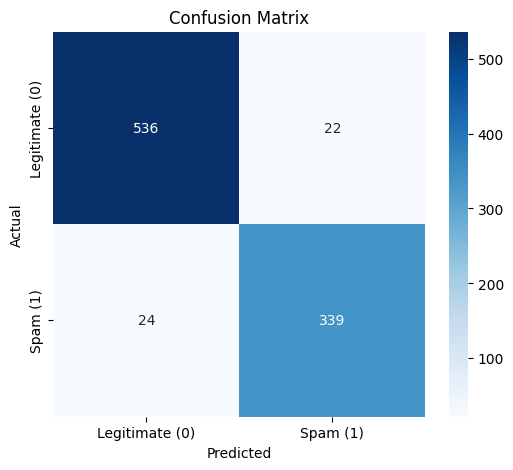

In [14]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['Legitimate (0)', 'Spam (1)']

# Using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


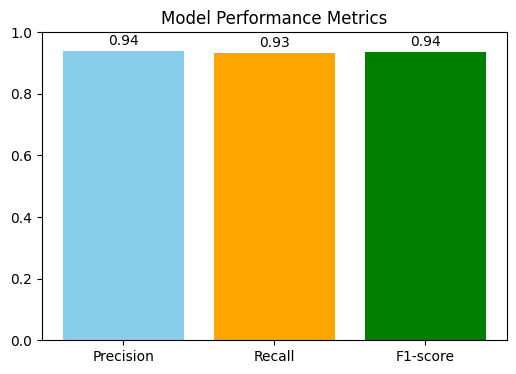

In [15]:
# metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot

metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-score']

plt.figure(figsize=(6,4))
plt.bar(labels, metrics, color=['skyblue','orange','green'])
plt.ylim(0,1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.title("Model Performance Metrics")
plt.show()


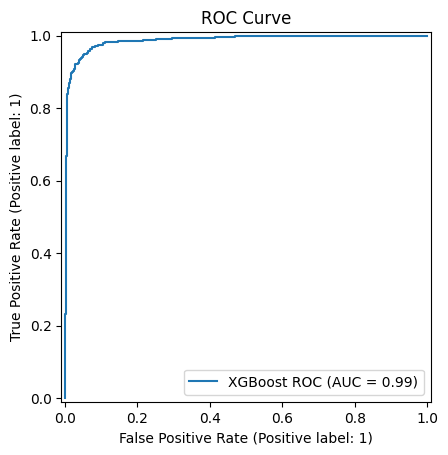

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for positive class
y_prob = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost ROC")
plt.title("ROC Curve")
plt.show()


### Step 5: Ethical AI & Bias Analysis

Even in spam email detection, it is important to ensure that the model is **fair, interpretable, and free from unintended biases**.  

Key considerations in this step:

1. **Feature Review & Interpretability**  
   - Examine which features drive the model's predictions.  
   - Remove features that are non-generalizable (e.g., tied to specific names, numbers, or rare tokens) as they may mislead the model or reduce its applicability.

2. **Bias & Fairness**  
   - Check if the model performs consistently across different categories, such as email domains, languages, or formats.  
   - Ensure that predictions are not unfairly influenced by irrelevant or non-representative features.

3. **Limitations & Mitigations**  
   - Some features may reflect historical spam patterns and not capture emerging tactics.  
   - Mitigations include retraining the model with updated data, removing weak or biased features, and prioritizing universally predictive features.

4. **Transparency & Documentation**  
   - Document which features were removed and why.  
   - Provide rationale for hyperparameter choices, model selection, and evaluation metrics.

> **Caption for Figure / Table**: "Feature importance analysis was used to identify and remove non-generalizable or weak predictors, ensuring that the model focuses on robust and interpretable indicators of spam emails."


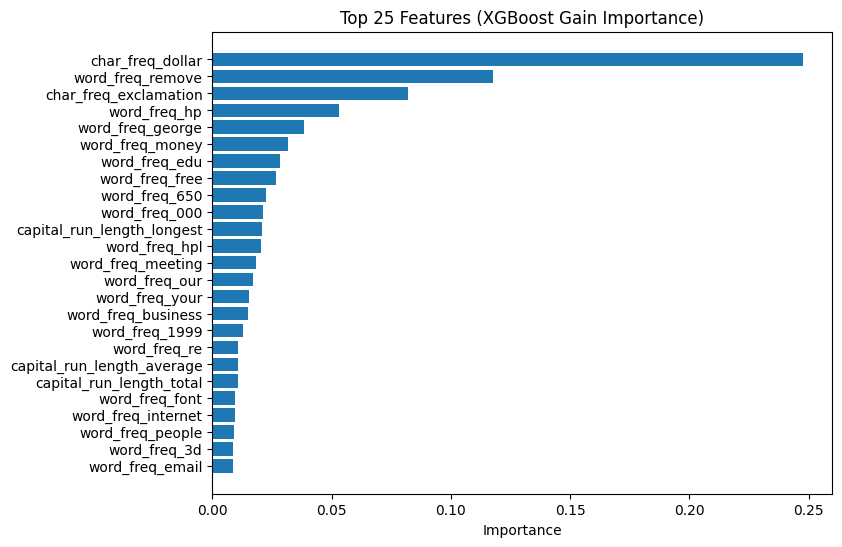

In [17]:
importance = xgb.feature_importances_

fi = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(fi["Feature"][:25], fi["Importance"][:25])
plt.gca().invert_yaxis()
plt.title("Top 25 Features (XGBoost Gain Importance)")
plt.xlabel("Importance")
plt.show()


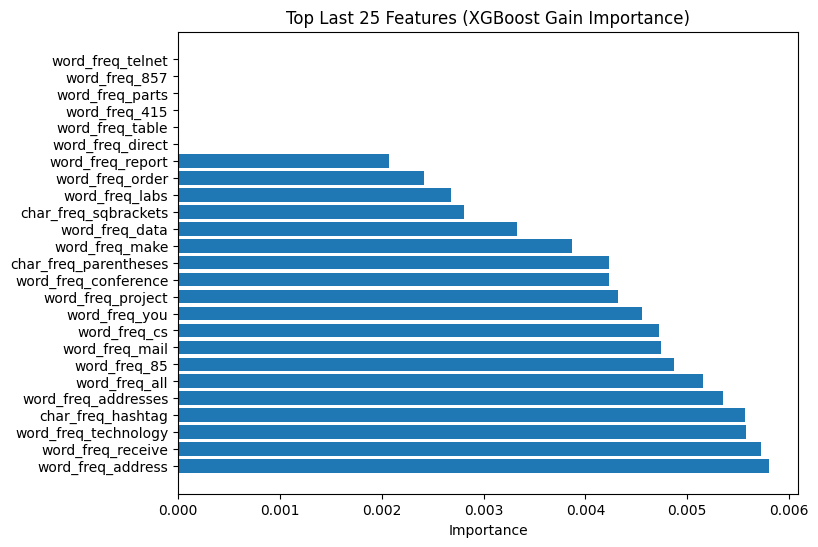

In [18]:
importance = xgb.feature_importances_

fi = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8,6))
plt.barh(fi["Feature"][:25], fi["Importance"][:25])
plt.gca().invert_yaxis()
plt.title("Top Last 25 Features (XGBoost Gain Importance)")
plt.xlabel("Importance")
plt.show()


### How to Decide Which Features to Remove

Feature importance scores were first used to screen for features that contribute little to predictive performance or could introduce bias. However, importance alone was not the only factor considered. Features were evaluated using the following criteria:

1. **Non-Generalizable Features** – Tied to specific individuals or rare identifiers rather than universal spam patterns:
   - `word_freq_george`, `word_freq_hp`, `word_freq_hpl`  
   - `word_freq_lab`, `word_freq_labs`  
   - `word_freq_650`, `word_freq_415`, `word_freq_857`, `word_freq_85`  
   - `word_freq_1999`

2. **Very Low Importance Features** – Weak predictors that provide minimal signal to the model:
   - `word_freq_telnet`, `word_freq_857`, `word_freq_parts`, `word_freq_415`, `word_freq_table`, `word_freq_direct`


In [19]:
# Features identified for removal
non_generalizable = [
    "word_freq_george", "word_freq_hp", "word_freq_hpl",
    "word_freq_lab", "word_freq_labs",
    "word_freq_650", "word_freq_415", "word_freq_857", "word_freq_85",
    "word_freq_1999"
]

low_importance = [
    "word_freq_telnet", "word_freq_857", "word_freq_parts",
    "word_freq_415", "word_freq_table", "word_freq_direct"
]

features_to_remove = list(set(non_generalizable + low_importance))

In [20]:
X = df.drop(columns=["class"] + features_to_remove)
y = df["class"]

print("Remaining features:", X.shape[1])

Remaining features: 43


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
xgb_refined = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.2,
    subsample=1,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_refined.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

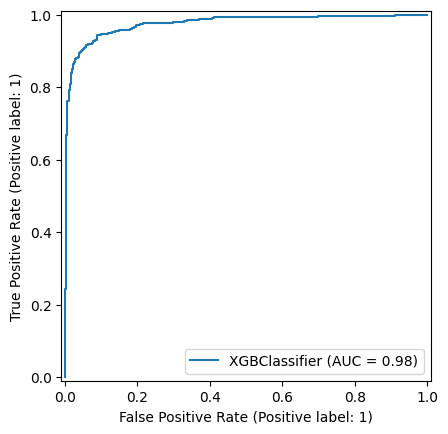

In [23]:
# Predictions
y_pred = xgb_refined.predict(X_test)
y_prob = xgb_refined.predict_proba(X_test)[:, 1]


# ROC Curve
RocCurveDisplay.from_estimator(xgb_refined, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       558
           1       0.92      0.91      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

ROC-AUC: 0.9762


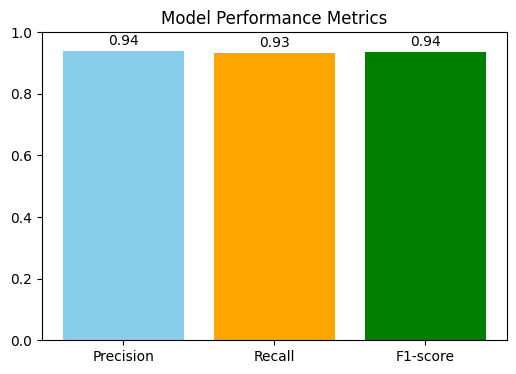

In [24]:
# Metrics
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {auc_score:.4f}")

# Plot

metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-score']

plt.figure(figsize=(6,4))
plt.bar(labels, metrics, color=['skyblue','orange','green'])
plt.ylim(0,1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.title("Model Performance Metrics")
plt.show()

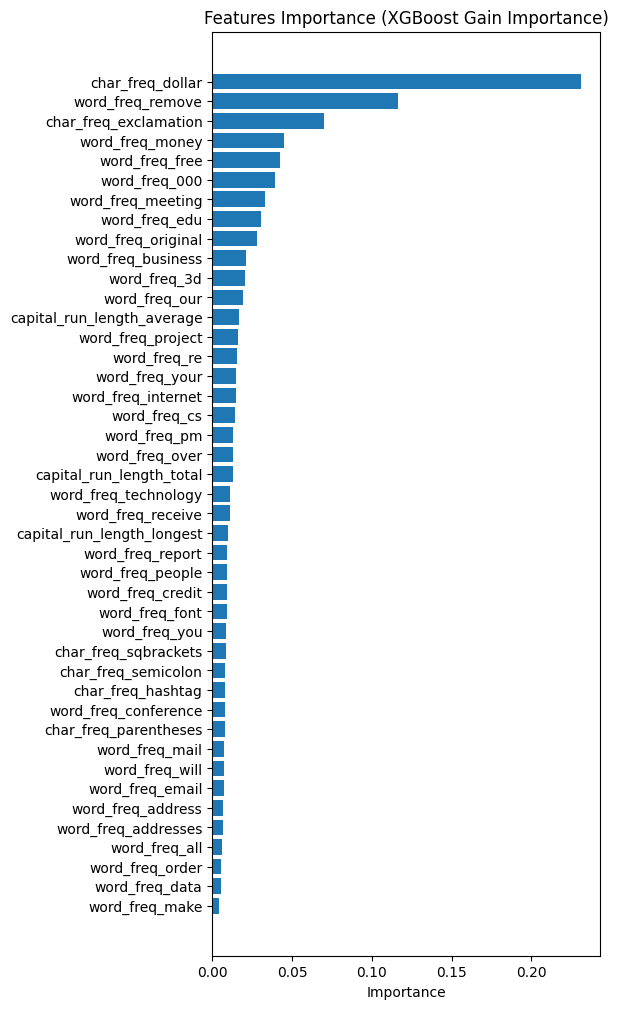

In [26]:
importance = xgb_refined.feature_importances_

fi = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(5,12))
plt.barh(fi["Feature"][:], fi["Importance"][:])
plt.gca().invert_yaxis()
plt.title("Features Importance (XGBoost Gain Importance)")
plt.xlabel("Importance")
plt.show()

In [27]:
import joblib

# Save the model
joblib.dump(xgb_refined, "../model/xgb_refined_spam_model.pkl")

# Later, to load it
# xgb_loaded = joblib.load("xgb_spam_model.pkl")

# For predict
# y_pred_loaded = xgb_loaded.predict(X_test)


['../model/xgb_refined_spam_model.pkl']